In [1]:
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Dropout, InputLayer, Flatten, Reshape, Input
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(X_mat, Y), (X_t_mat, _) = mnist.load_data()
X_mat = X_mat/255
X_t_mat = X_t_mat/255

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
n_comps = 256
img_shape = X_mat.shape[1:]

encoder = Sequential()
encoder.add(InputLayer(img_shape))
encoder.add(Flatten())                  #flatten image to vector
encoder.add(Dense(n_comps))           #actual encoder

decoder = Sequential()
decoder.add(InputLayer((n_comps,)))
decoder.add(Dense(np.prod(img_shape)))  #actual decoder, height*width*3 units
decoder.add(Reshape(img_shape))         #un-flatten

In [4]:
print(encoder.summary())
print(decoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
Total params: 200,960
Trainable params: 200,960
Non-trainable params: 0
_________________________________________________________________
None
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               201488    
_________________________________________________________________

In [0]:
input_tensor = Input(img_shape)
cod = encoder(input_tensor)
aprox = decoder(cod)

autoencoder = Model(inputs=input_tensor, outputs=aprox)
# autoencoder.compile(optimizer='adamax', loss='mse', metrics=['accuracy'])
# autoencoder.compile(optimizer='SGD', loss='mse', metrics=['accuracy'])
autoencoder.compile(optimizer='nadam', loss='mse', metrics=['accuracy'])

In [8]:
autoencoder.fit(x=X_mat, y=X_mat, epochs=15,
                validation_data=(X_t_mat, X_t_mat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 13s 209us/step - loss: 0.0066 - acc: 0.3413 - val_loss: 0.0033 - val_acc: 0.3606
Epoch 2/15
60000/60000 [==============================] - 13s 209us/step - loss: 0.2484 - acc: 0.3464 - val_loss: 0.0041 - val_acc: 0.3503
Epoch 3/15
60000/60000 [==============================] - 13s 209us/step - loss: 0.0091 - acc: 0.3579 - val_loss: 0.0023 - val_acc: 0.3578
Epoch 4/15
60000/60000 [==============================] - 12s 206us/step - loss: 0.0048 - acc: 0.3641 - val_loss: 0.0021 - val_acc: 0.3598
Epoch 5/15
60000/60000 [==============================] - 13s 210us/step - loss: 0.0026 - acc: 0.3670 - val_loss: 0.0022 - val_acc: 0.3600
Epoch 6/15
60000/60000 [==============================] - 13s 212us/step - loss: 0.0018 - acc: 0.3694 - val_loss: 0.0017 - val_acc: 0.3623
Epoch 7/15
60000/60000 [==============================] - 13s 209us/step - loss: 0.0017 - acc: 0.3696 - val_loss: 0.

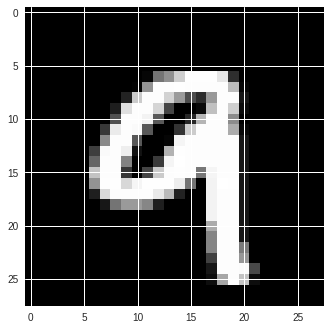

(1, 28, 28)


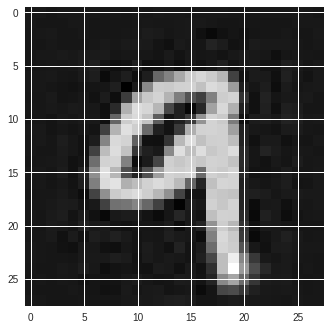

In [13]:
index = int(np.random.uniform(0, len(X_t_mat)))

img_cod = encoder.predict(np.expand_dims(X_t_mat[index], axis=0))
img_dec = decoder.predict(img_cod)

plt.imshow(X_t_mat[index], cmap='gray')
plt.show()
print(img_dec.shape)
plt.imshow(img_dec[0], cmap='gray')
plt.show()

# Ahora usaremos un autoencoder más complejo con un codigo mas pequeño

In [0]:
n_comps = 32
img_shape_deep = X_mat.shape[1:]

encoder_deep = Sequential()
encoder_deep.add(InputLayer(img_shape_deep))
encoder_deep.add(Flatten())                  #flatten image to vector
encoder_deep.add(Dense(512, activation='relu'))
encoder_deep.add(Dense(256, activation='relu'))
encoder_deep.add(Dense(128, activation='relu'))
encoder_deep.add(Dense(n_comps))

decoder_deep = Sequential()
decoder_deep.add(InputLayer((n_comps,)))
decoder_deep.add(Dense(128, activation='relu'))
decoder_deep.add(Dense(256, activation='relu'))
decoder_deep.add(Dense(512, activation='relu'))
decoder_deep.add(Dense(np.prod(img_shape_deep)))  #actual decoder, height*width*3 units
decoder_deep.add(Reshape(img_shape_deep))         #un-flatten

In [15]:
print(encoder_deep.summary())
print(decoder_deep.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                4128      
Total params: 570,272
Trainable params: 570,272
Non-trainable params: 0
_________________________________________________________________
None

In [20]:
input_tensor_deep = Input(img_shape_deep)
cod_deep = encoder_deep(input_tensor_deep)
aprox_deep = decoder_deep(cod_deep)
print(aprox_deep.shape)

autoencoder_deep = Model(inputs=input_tensor_deep, outputs=aprox_deep)
# autoencoder_deep.compile(optimizer='adamax', loss='mse', metrics=['accuracy'])
# autoencoder_deep.compile(optimizer='SGD', loss='mse', metrics=['accuracy'])
autoencoder_deep.compile(optimizer='nadam', loss='mse')

(?, 28, 28)


In [21]:
print(img_shape_deep)
print(autoencoder_deep.summary())

(28, 28)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 32)                570272    
_________________________________________________________________
sequential_4 (Sequential)    (None, 28, 28)            571024    
Total params: 1,141,296
Trainable params: 1,141,296
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
autoencoder_deep.fit(x=X_mat, y=X_mat, epochs=30,
                validation_data=(X_t_mat, X_t_mat))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 25s 425us/step - loss: 0.0275 - val_loss: 0.0219
Epoch 2/30
60000/60000 [==============================] - 25s 422us/step - loss: 0.0181 - val_loss: 0.0166
Epoch 3/30
60000/60000 [==============================] - 27s 444us/step - loss: 0.0155 - val_loss: 0.0149
Epoch 4/30
60000/60000 [==============================] - 26s 433us/step - loss: 0.0139 - val_loss: 0.0137
Epoch 5/30
60000/60000 [==============================] - 26s 434us/step - loss: 0.0127 - val_loss: 0.0120
Epoch 6/30
60000/60000 [==============================] - 29s 477us/step - loss: 0.0119 - val_loss: 0.0115
Epoch 7/30
60000/60000 [==============================] - 29s 476us/step - loss: 0.0112 - val_loss: 0.0112
Epoch 8/30
60000/60000 [==============================] - 29s 479us/step - loss: 0.0106 - val_loss: 0.0105
Epoch 9/30
60000/60000 [==============================] - 28s 473us/step - loss: 0.0101 - val_

(28, 28)


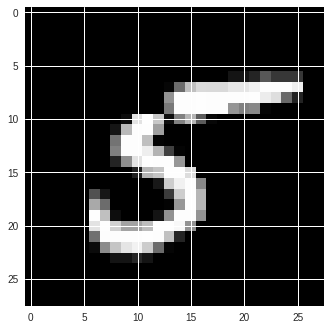

----------------


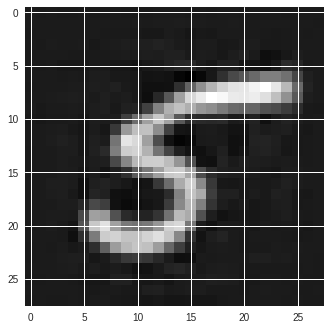

In [23]:
index = int(np.random.uniform(0, len(X_t_mat)))

img_cod = encoder_deep.predict(np.expand_dims(X_t_mat[index], axis=0))
img_dec = decoder_deep.predict(img_cod)

print(img_dec[0].shape)
plt.imshow(X_t_mat[index], cmap='gray')
plt.show()
print('----------------')
plt.imshow(img_dec[0], cmap='gray')
plt.show()